# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [36]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [37]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
display(df[['title', 'title_length']].head())

,title,title_length
0,The Shawshank Redemption,24
1,The Godfather,13
2,The Godfather: Part II,22
3,The Dark Knight,15
4,Pulp Fiction,12


In [38]:
# Calcula media, mediana y moda de la columna 'title_length'
mean_value = df['title_length'].mean()
median_value = df['title_length'].median()
mode_value = df['title_length'].mode()
display(f"MEDIA = {mean_value}, MEDIANA = {median_value}, MODA = {mode_value}")

'MEDIA = 15.481103166496425, MEDIANA = 14.0, MODA = 0    12\nName: title_length, dtype: int64'

In [39]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
# Rango = agarra el valor mas grande menos el valor mas pequeño
range_value = df['title_length'].max() - df['title_length'].min()
# Varianza =
variance_value = df['title_length'].var()
# Desviacion Std =
std_dev_value = df['title_length'].std()

display(f"Rango= {range_value}, Varianza= {variance_value}, Desviación Std= {std_dev_value}")

'Rango= 67, Varianza= 72.1067488840288, Desviación Std= 8.491569282766807'

In [40]:
# Calcula asimetría y curtosis de la columna 'title_length'

# Calculando la asimetría:
asimetria = df['title_length'].skew() 

# Calculando la curtosis:
curtosis = df['title_length'].kurtosis()

display(f"Asimetria = {asimetria}, Curtosis = {curtosis}" )

'Asimetria = 1.5252523464631278, Curtosis = 3.8122887061291544'

In [41]:
# Imprime el título más corto y el título más largo según su longitud
shortest_title_df = df[df['title_length'] == df['title_length'].min()]
longest_title_df = df[df['title_length'] == df['title_length'].max()]

#creo las variables y convierto un array del dataframe en una lista
shortest_titles = shortest_title_df['title'].tolist()
longest_titles = longest_title_df['title'].tolist()

display(f"Título más corto: {shortest_titles}")
display(f"Título más largo: {longest_titles}")

"Título más corto: ['M']"

"Título más largo: ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']"

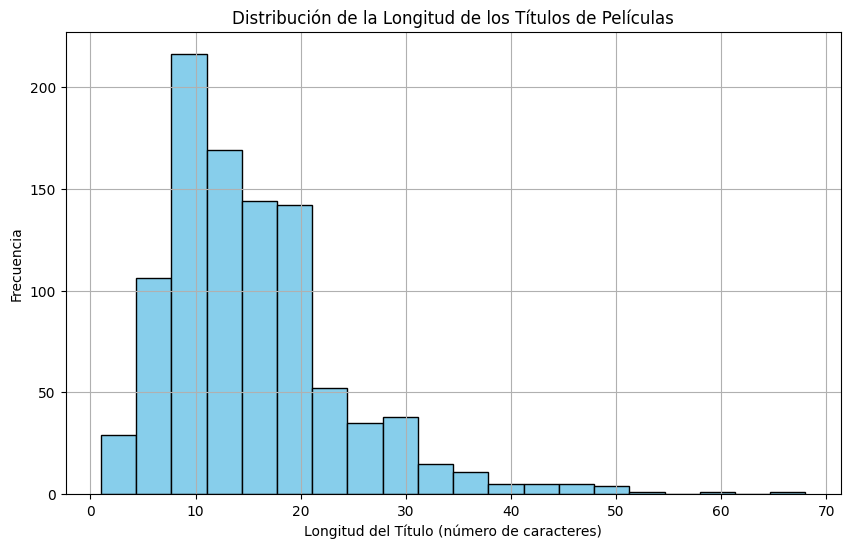

In [42]:
# grafica tus resultados
plt.figure(figsize=(10, 6))

# Sacando un histograma
plt.hist(df['title_length'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribución de la Longitud de los Títulos de Películas')
plt.xlabel('Longitud del Título (número de caracteres)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

La distribucion se nota sesgada hacia la derecha, significando que la mayoria de los titulos son mas cortos y hay un numero menor de titulos muy largos.

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [43]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

# Selecciono 5 valores aleatorios de 'title_length' y los agrego a una nueva lista
new_list = []
for new in df['title_length'].sample(5):
    new_list.append(new)

display(f"Lista de 5 valores reales de longitud de título: {new_list}")

'Lista de 5 valores reales de longitud de título: [20, 5, 28, 13, 6]'

In [44]:
# Calcula la media de los 5 valores
new_list_mean = np.mean(new_list)
display(f"La media de los 5 valores es: {new_list_mean}")

'La media de los 5 valores es: 14.4'

In [45]:
# Calcula las diferencias al cuadrado con respecto a la media
squared_results = [(x - new_list_mean)**2 for x in new_list]
display(squared_results)

[np.float64(31.359999999999996),
 np.float64(88.36000000000001),
 np.float64(184.95999999999998),
 np.float64(1.960000000000001),
 np.float64(70.56)]

In [46]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

# Varianza: promedio de las diferencias al cuadrado
variance = np.mean(squared_results)

# Desviación estándar: raíz cuadrada de la varianza
std_dev = np.std(new_list)

display(f"Varianza: {variance}")
display(f"Desviación estándar: {std_dev}")

'Varianza: 75.44'

'Desviación estándar: 8.685620300243386'